In [4]:
# XGBoost (eXtra Gradient Boost)

import xgboost

print(xgboost.__version__)

0.90


In [7]:
import xgboost as xgb
from xgboost import plot_importance # 중요도를 0~1 사이로 측정

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

In [10]:
#데이터 확인하기 위해 데이터 프레임으로 생성
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)

# 맨 마지막에 target 추가
cancer_df['target']=y_label
cancer_df.head()

#악성 0, 양성 1


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
# 레이블 값 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

# 악성(malignant)
# 양성(benign)

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X_features, y_label,
                                                test_size=0.2, random_state = 156)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [14]:
# 파이썬 xgboost를 사용하려면 DMatrix 타입으로 변환해야 한다.
# 학습용, 테스트용 데이터 세트 생성

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [23]:
params = { 'max_depth':3,
        'eta': 0.1,
        'objective':'binary:logistic',
         'eval_metric ' : 'logloss',
         'early_stopping':100}

num_rounds = 400 # 400번 반복

In [24]:
wlist = [(dtrain,'train'),(dtest,'eval')] # eval 평가용

xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round = num_rounds,
                     early_stopping_rounds=100, evals=wlist)

[0]	train-error:0.030769	eval-error:0.052632
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 100 rounds.
[1]	train-error:0.026374	eval-error:0.061404
[2]	train-error:0.017582	eval-error:0.052632
[3]	train-error:0.021978	eval-error:0.061404
[4]	train-error:0.013187	eval-error:0.052632
[5]	train-error:0.013187	eval-error:0.052632
[6]	train-error:0.013187	eval-error:0.052632
[7]	train-error:0.013187	eval-error:0.052632
[8]	train-error:0.013187	eval-error:0.052632
[9]	train-error:0.013187	eval-error:0.052632
[10]	train-error:0.015385	eval-error:0.052632
[11]	train-error:0.013187	eval-error:0.052632
[12]	train-error:0.015385	eval-error:0.052632
[13]	train-error:0.013187	eval-error:0.052632
[14]	train-error:0.010989	eval-error:0.052632
[15]	train-error:0.010989	eval-error:0.052632
[16]	train-error:0.008791	eval-error:0.052632
[17]	train-error:0.008791	eval-error:0.052632
[18]	train-error:0.008791	eval-error

In [25]:
pred_probs = xgb_model.predict(dtest)
print('predict( )수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds = [1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시 : ', preds[:10])

predict( )수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.875 0.003 0.934 0.173 0.987 1.    0.999 0.998 0.996 0.   ]
예측값 10개만 표시 :  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [28]:
# 테스트 실제 레이블 값을 가지는 y_test와 예측 레이블인 preds
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9947


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

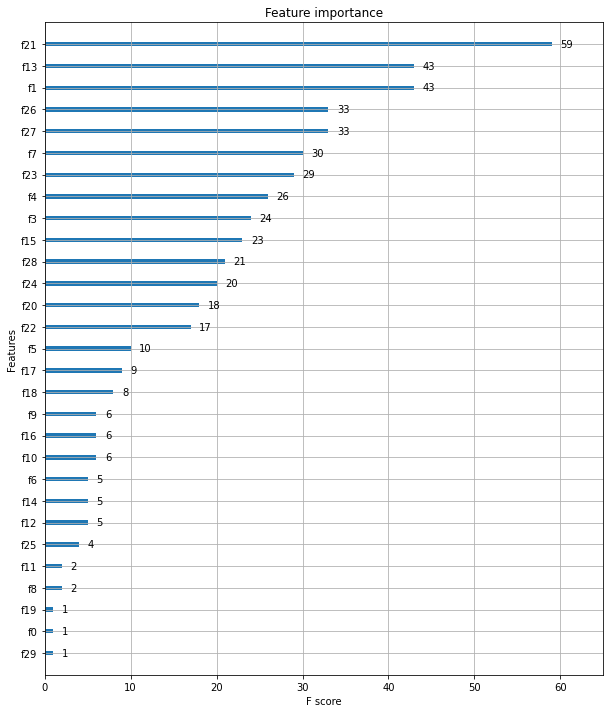

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

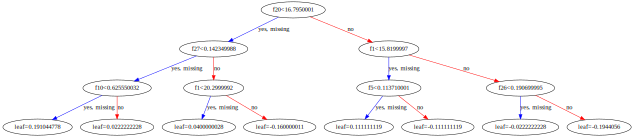

In [31]:
from sklearn.tree import export_graphviz
xgboost.to_graphviz(xgb_model, size='8.8')

In [32]:
# 사이킷런 래퍼  XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)

# 학습과 예측 수행 : fit(), predict(), predict_proba() 이용
# fit()에서 early_stopping_rounds 설정
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=400,
               eval_set = evals, eval_metric = 'logloss', verbose=True)

w_preds=xgb_wrapper.predict(X_train)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

# 결과 validation_0-logloss 값이 계속 적어짐
# n_estimator로 설정한 400이 끝나면 종료


[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [33]:
get_clf_eval(y_test, w_preds, w_pred_proba)

ValueError: Found input variables with inconsistent numbers of samples: [114, 455]

In [36]:
# ealy stopping이 어떻게 동작하는지 확인

from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)

evals=[(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100,
               eval_set = evals, eval_metric = 'logloss', verbose=True)

ws_preds=xgb_wrapper.predict(X_test)
ws_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]


[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [37]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

NameError: name 'ws100_preds' is not defined

In [38]:

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
               eval_set = evals, eval_metric = 'logloss', verbose=True)

ws10_preds = xgb_wapper.predict(X_test)

ws_preds=xgb_wrapper.predict(X_test)
ws_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]


[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


NameError: name 'xgb_wapper' is not defined

3.1.1
